<div style="text-align: center;">
Paola Guadalupe Pérez Ramírez <br> 22110143 <br> 7°P
<div>

In [13]:
import spacy
import wikipedia
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [14]:
nlp = spacy.load("es_core_news_sm")

wikipedia.set_lang("en")
contenido = wikipedia.page("Willow processor").content

doc = nlp(contenido)

for entidad in doc.ents:
    print(f"{entidad.text} → {entidad.label_}")


Willow → MISC
Google → ORG
AI and manufactured in Santa Barbara → ORG
California → LOC
Willow is the first chip to achieve below → MISC
On December 9 → MISC
Google → ORG
Willow in a Nature → MISC
First → MISC
Willow → MISC
achieving below → ORG
Second → MISC
Willow → MISC
Random Circuit Sampling → ORG
RCS → ORG
years → MISC
Willow → MISC
square grid of superconducting transmon physical qubits → MISC
Improvements over past work were attributed to improved fabrication techniques → MISC
Willow → MISC
optimism in accelerating applications in pharmaceuticals → MISC
science → MISC
logistics → MISC
drug discovery → PER
Popular → ORG
Google → ORG
spokesman said that they were still at least 10 years out from breaking RSA → MISC
Hartmut Neven → PER
the BBC that Willow → MISC
and in the announcement blogpost → MISC
the belief that advanced AI will → ORG
Willow → MISC
the release of Foxtail in 2017 → MISC
Bristlecone in 2018, and Sycamore in 2019 → MISC
Willow → MISC
T1 → LOC
time from Sycamore's

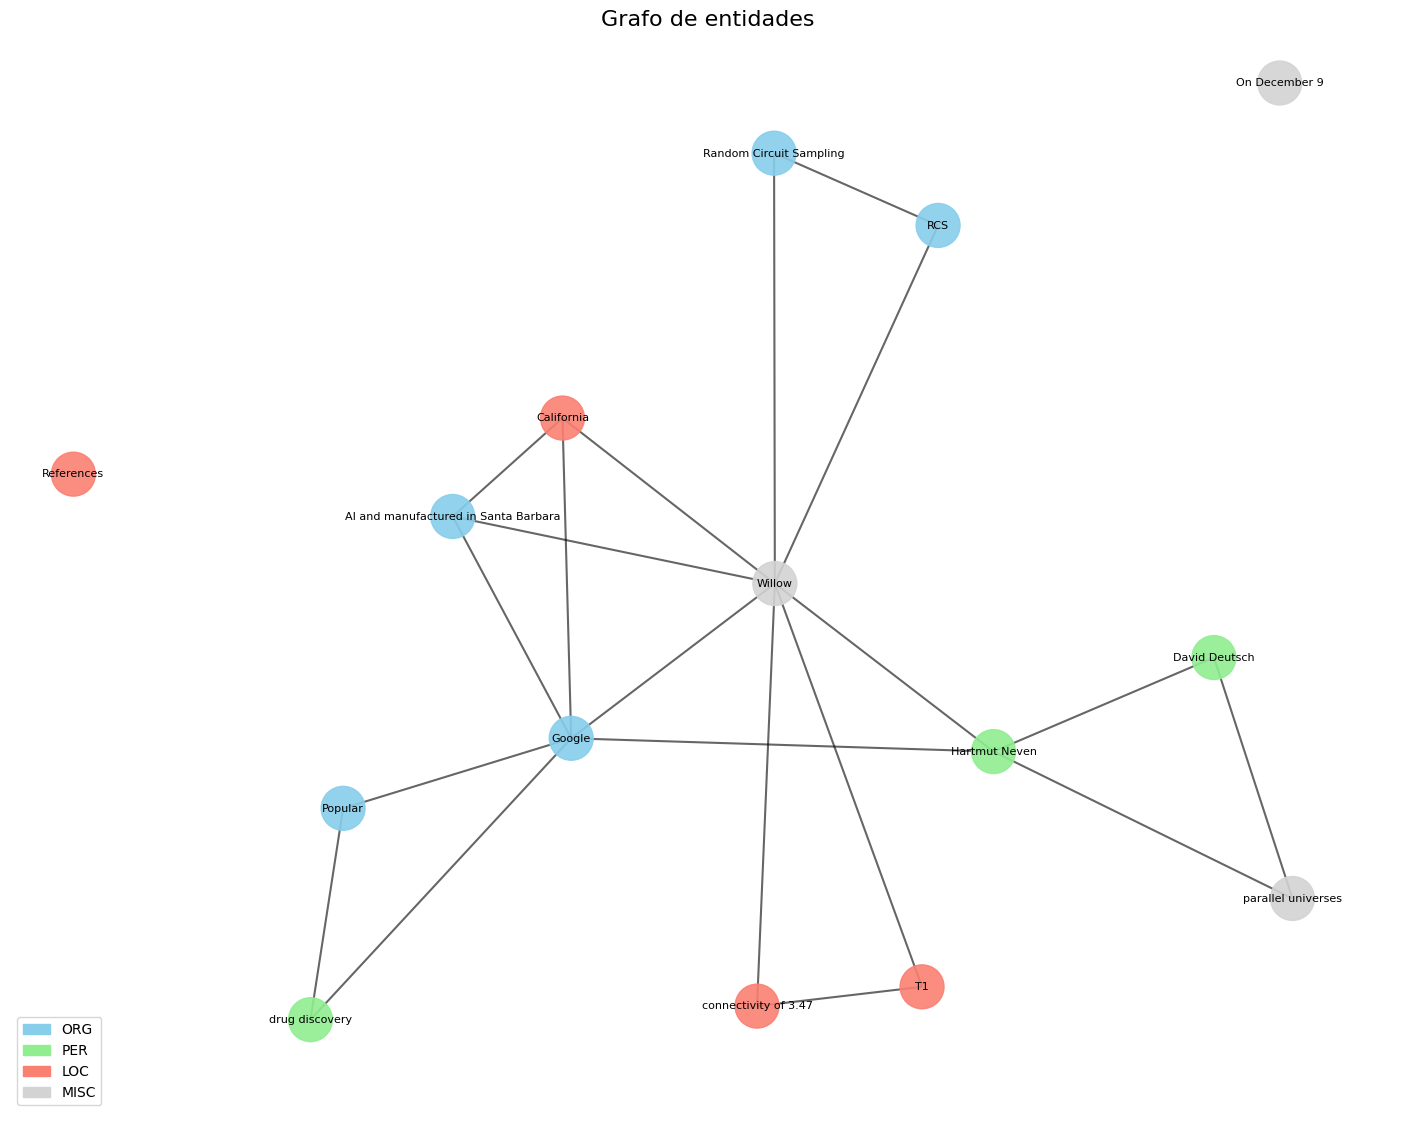

In [ ]:
entidades = [
    ("Willow", "MISC"), ("Google", "ORG"), ("AI and manufactured in Santa Barbara", "ORG"),
    ("California", "LOC"), ("On December 9", "MISC"), ("Random Circuit Sampling", "ORG"),
    ("RCS", "ORG"), ("drug discovery", "PER"), ("Popular", "ORG"), ("Hartmut Neven", "PER"),
    ("T1", "LOC"), ("connectivity of 3.47", "LOC"), ("David Deutsch", "PER"), ("References", "LOC")
]

grupos = [
    ["Willow", "Google", "AI and manufactured in Santa Barbara", "California"],
    ["Willow", "Random Circuit Sampling", "RCS"],
    ["drug discovery", "Popular", "Google"],
    ["Hartmut Neven", "Google", "Willow"],
    ["Willow", "T1", "connectivity of 3.47"],
    ["Hartmut Neven", "parallel universes", "David Deutsch"],
]

G = nx.Graph()

for nombre, tipo in entidades:
    G.add_node(nombre, tipo=tipo)

for grupo in grupos:
    for entidad in grupo:
        if entidad not in G.nodes:
            G.add_node(entidad, tipo="MISC")
    for i in range(len(grupo)):
        for j in range(i + 1, len(grupo)):
            G.add_edge(grupo[i], grupo[j])

colores = {
    "ORG": "skyblue",
    "PER": "lightgreen",
    "LOC": "salmon",
    "MISC": "lightgrey"
}
node_colors = [colores.get(G.nodes[n]['tipo'], "white") for n in G.nodes]

leyenda = [
    mpatches.Patch(color="skyblue", label="ORG"),
    mpatches.Patch(color="lightgreen", label="PER"),
    mpatches.Patch(color="salmon", label="LOC"),
    mpatches.Patch(color="lightgrey", label="MISC"),
]

plt.figure(figsize=(18, 14))
pos = nx.spring_layout(G, seed=42, k=0.8)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.legend(handles=leyenda, loc="lower left", fontsize=10)
plt.title("Grafo de entidades", fontsize=16)
plt.axis("off")
plt.show()
